## Missing Values- Feature Engineering

Lifecycle of a Data Science Projects:

1. Data Collection Statergy---from company side,3rd party APi's,Surveys,Surveys
2. Feature Engineering---Handling Missing Values

Why are their Missing values?? Survey--Depression Survey

1. They hesitate to put down the information
2. Survey informations are not that valid
3. Men--salary
4. Women---age
5. People may have died----NAN
Data Science Projects---Dataset should be collected from multiple sources

### What are the different types of Missing Data?

#### 1. Missing Completely at Random, MCAR: 
A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.

In [10]:
import pandas as pd

In [11]:
df = pd.read_csv('titanic_train.csv')

In [12]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#here we see age and cabin information are missing this probably due to reason that as the data was collected after accident and the person might have died so no one present to give information about age and cabin

#Also the columns "Age" and "Cabbin" where they stayed might be related in some way hence can't be considered as Missing Completely at Random, MCAR 

#however the column "Embarked" can be considered as Missing Completely at Random, MCAR

In [14]:
df[df['Embarked'].isnull()]

PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN

#### 2.Missing Data Not At Random(MNAR) also know as Systematic missing Values:
There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.


In [15]:
#here "Age" and "cabin" fall in that category

In [16]:
#wherever cabin is present as nan i will convert it to 1s or 0s

In [18]:
import numpy as np
df['cabin_null'] = np.where(df['Cabin'].isnull(),1,0)




In [19]:
#finding percentage of null values
df['cabin_null'].mean()


0.7710437710437711

In [20]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null'],
      dtype='object')

In [22]:
#suppose I need to calculate the mean of missing values for the people who have survived

In [23]:
df.groupby(['Survived'])['Cabin']

In [24]:
#here we are checking the percentage of survived
#we can see in survived=1 i.e survived 60 percent has missing values
#we can see in non_survived 87 percent of people have missing values
#information makes sense as people who have not survived those people will have missing data

df.groupby(['Survived'])['cabin_null'].mean()



Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

#### 3.Missing at Random(MAR):

examples:
Men---hide their salary

Women---hide their age

Here probability of missing values due to various features will be same in whole dataset

### All the techniques of handling ,issing values



1. Mean/ Median/Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation

#### Mean/ Median/Mode imputations

When should we apply? 

Mean/median imputation has the assumption that the data are missing completely at random(MCAR). 

We solve this by replacing the NAN with the most frequent occurance of the variables

In [25]:
df = pd.read_csv('titanic_train.csv')

In [28]:
df = pd.read_csv('titanic_train.csv',usecols = ['Age','Fare','Survived'])

In [30]:
df.head()

Survived   Age     Fare
0         0  22.0   7.2500
1         1  38.0  71.2833
2         1  26.0   7.9250
3         1  35.0  53.1000
4         0  35.0   8.0500

In [37]:
#lets check the percentage of missing values
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [38]:
#Create a function that will impute the nan values
#parameters which i would like toi take are are dataset=df, feature_name=variable, type_imputation=mean/median/mode

In [42]:
def impute_nan(df,variable,median):
    df[variable+"_median"] = df[variable].fillna(median)

In [43]:
#we are not using mean here as it can have some outliers
#median value of dataset

median = df.Age.median()
median

28.0

In [44]:
impute_nan(df,'Age',median)
df.head()

Survived   Age     Fare  Age_median
0         0  22.0   7.2500        22.0
1         1  38.0  71.2833        38.0
2         1  26.0   7.9250        26.0
3         1  35.0  53.1000        35.0
4         0  35.0   8.0500        35.0

In [47]:
#checking the impact of standard deviation to 'Age' column before and after imputations

print(df['Age'].std())
print(df['Age_median'].std())


14.526497332334044
13.019696550973194


In [48]:
import matplotlib.pyplot as plt
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
D:\Drivers\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


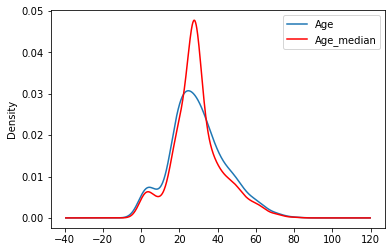

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Advantages And Disadvantages of Mean/Median Imputation
#### Advantages
1. Easy to implement(Robust to outliers)
2. Faster way to obtain the complete dataset 

#### Disadvantages
1. Change or Distortion in the original variance
2. Impacts Correlation
 